In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
beer = pd.read_csv('data/recipeData.csv', index_col='BeerID', encoding='latin1')

In [3]:
beer.shape

(73861, 21)

In [4]:
beer.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [114]:
beer['StyleID'].nunique()

176

In [5]:
stylecounts = pd.DataFrame(beer['Style'].value_counts().reset_index())
stylecounts.loc[stylecounts['Style']>400,:]


,index,Style
0,American IPA,11940
1,American Pale Ale,7581
2,Saison,2617
3,American Light Lager,2277
4,American Amber Ale,2038
5,Blonde Ale,1753
6,Imperial IPA,1478
7,American Stout,1268
8,Irish Red Ale,1204
9,American Brown Ale,1152


In [8]:
v = beer['IPA'] = (beer['Style'].str.contains(' IPA'))*'IPA'

In [9]:
c = beer['Pale Ale'] = (beer['Style'].str.contains('Pale Ale'))*'Pale Ales' 

In [10]:
d = beer['Light Lager'] = (beer['Style'].str.contains('Light Lager'))*'Light '

In [11]:
o = beer['Lager'] = (beer['Style'].str.contains(' Lager|Common |Steam '))*'Lager'

In [13]:
f = beer['Pale Ale'] = (beer['Style'].str.contains('Saison|Strong Bitter'))*'Pale Ales'

In [17]:
k = beer['Stout-Porter'] = (beer['Style'].str.contains(' Stout| Porter'))*'Stout-Porter' 

In [18]:
#m = beer['Ales'] = (beer['Style'].str.contains(' Ale'))*'Ales'

In [20]:
#n = beer['Ales'] = (beer['Style'].str.contains('Brown Ale|Strong Ale|Dark Ale|Red Ale|Amber Ale|Blonde Ale|Blond Ale|Cream Ale'))*'Ales'

In [21]:
q = beer['Weissbier'] = (beer['Style'].str.contains('Witbier|Weissbier|Weizenbier|Weizen/Weissbier'))*'Weissbier'

In [23]:
#t = beer['Porter'] = (beer['Style'].str.contains(' Porter'))*'Porter'

In [25]:
beer['kind'] = c+d+f+k+o+q+v+''
beer['kind'].value_counts()

                27157
IPA             17064
Pale Ales       11963
Stout-Porter     8654
Weissbier        3181
Lager            2969
Light Lager      2277
Name: kind, dtype: int64

In [26]:
beer2 = pd.DataFrame(beer.iloc[:,:-7])

In [27]:
beer2.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [28]:
beer2['kind'] = beer['kind']

In [29]:
beer2['kind'] =  beer2['kind'].replace('',np.nan)

In [30]:
beer2['kind'].count()

46108

In [31]:
beer2['kind'].value_counts()

IPA             17064
Pale Ales       11963
Stout-Porter     8654
Weissbier        3181
Lager            2969
Light Lager      2277
Name: kind, dtype: int64

In [32]:
## Count nulls 
null_count = beer2.isnull().sum()
null_count[null_count>0]

Name                 1
Style              596
BoilGravity       2990
MashThickness    29864
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
kind             27753
dtype: int64

PrimingMethod and PrimingAmount have too many nulls to be useful.

In [33]:
beer2 = beer2.drop(columns = ['PrimingMethod','PrimingAmount','URL','Name'])

I'm replacing the style column with my 'kind' column.

In [34]:
beer2 = beer2.drop(columns = ['Style'])

PitchRate also has an awful lot of nan values. I'll do a histogram to see if the nan values are consistent across all styles.

In [35]:
beer2.PitchRate.describe()

count    34609.000000
mean         0.750468
std          0.394262
min          0.000000
25%          0.350000
50%          0.750000
75%          1.000000
max          2.000000
Name: PitchRate, dtype: float64

In [36]:
beer2['PrimaryTemp'].describe()

count    51199.000000
mean        19.175641
std          4.219676
min        -17.780000
25%         18.000000
50%         20.000000
75%         20.000000
max        114.000000
Name: PrimaryTemp, dtype: float64

In [37]:
beer2['MashThickness'].describe()

count    43997.000000
mean         2.127235
std          1.682347
min          0.000000
25%          1.500000
50%          1.500000
75%          3.000000
max        100.000000
Name: MashThickness, dtype: float64

The counts for MashThickness, PitchRate and PrimaryTemp are fairly high. We can keep these features if they don't seem skewed toward one style or another.

In [38]:
beergroup = pd.DataFrame(beer2.groupby('StyleID')['MashThickness'].count().reset_index())

In [39]:
beergroup2 = pd.DataFrame(beer2.groupby('StyleID')['PrimaryTemp'].count().reset_index())

In [40]:
beergroup3 = pd.DataFrame(beer2.groupby('StyleID')['PitchRate'].count().reset_index())

In [41]:
beergroup.head()

,StyleID,MashThickness
0,1,95
1,2,22
2,3,11
3,4,1139
4,5,214


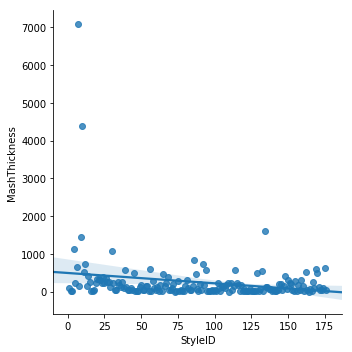

In [42]:
sns.lmplot(x = 'StyleID', y = 'MashThickness', data = beergroup)

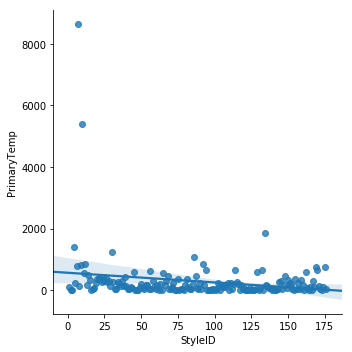

In [43]:
sns.lmplot(x = 'StyleID', y = 'PrimaryTemp', data = beergroup2)

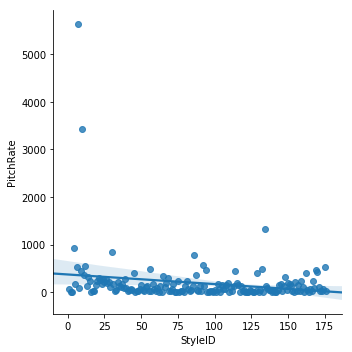

In [44]:
sns.lmplot(x = 'StyleID', y = 'PitchRate', data = beergroup3)

The available values for all of these seem to pretty consistent across styles. These columns could be useful. Let's do a correlation matrix to see if we actually need them.

In [45]:
beer.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
StyleID,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002326,0.021515,0.006167,0.079123,-0.019661
Size(L),-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.176071,0.108826,0.019246,0.026623,0.004278
OG,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.968138,0.067610,0.046841,0.020556,0.000518
FG,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.908611,0.061173,0.040541,0.013446,0.004477
ABV,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.025421,0.047853,-0.069633,0.132699,0.060065
IBU,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007498,-0.033172,-0.044381,0.006180,0.035510
Color,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013451,-0.017297,-0.038406,0.016061,0.025622
BoilSize,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175972,0.121971,0.017772,0.030936,0.003000
BoilTime,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026921,0.161295,0.006850,0.190922,-0.079809
BoilGravity,0.002326,0.176071,0.968138,0.908611,0.025421,-0.007498,0.013451,0.175972,0.026921,1.000000,0.059132,0.050944,0.016216,0.002268


These 3 columns don't seem to correlated strongly with anything else. I'll keep them.

(0, 10)

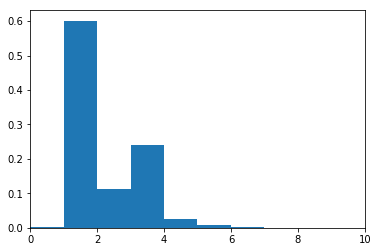

In [46]:
plt.hist(beer2['MashThickness'].dropna(),normed = True,bins = 100)
plt.xlim(0,10)

{'boxes': [<matplotlib.lines.Line2D at 0x1178af978>],
 'caps': [<matplotlib.lines.Line2D at 0x1178b83c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1178be080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1178b8c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1178afac8>,
  <matplotlib.lines.Line2D at 0x1178aff60>]}

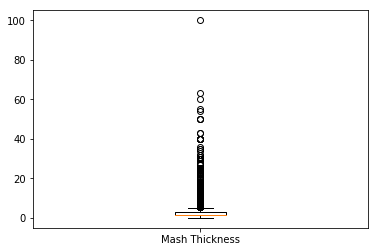

In [47]:
plt.boxplot(beer2['MashThickness'].dropna(), labels = ['Mash Thickness'])

MashThickness has a lot of really high outliers and the distribution is not normal. It probably makes more sense to replace nan values with the median than the mean.

(array([3.26070642e-04, 1.48213928e-05, 2.22320893e-05, 1.11160446e-04,
        2.59374375e-04, 3.70534821e-05, 1.70446018e-04, 3.70534821e-05,
        1.55624625e-04, 7.63301731e-04, 1.49103212e-02, 8.58899715e-03,
        1.67037097e-02, 1.25640947e-01, 1.68667450e-01, 3.34963478e-02,
        6.41766310e-03, 9.85622623e-04, 7.41069642e-04, 4.44641785e-05,
        1.18571143e-04, 1.40803232e-04, 7.41069642e-06, 2.22320893e-05,
        1.48213928e-05, 4.44641785e-05, 7.41069642e-06, 0.00000000e+00,
        0.00000000e+00, 3.70534821e-05, 2.22320893e-05, 4.07588303e-04,
        2.44552982e-04, 1.33392536e-04, 2.96427857e-05, 2.96427857e-05,
        0.00000000e+00, 3.70534821e-05, 7.41069642e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.41069642e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.48213928e-05]),
 array([-17.78  , -15.1444, -12.5088,  -9.8732,  -7.2376,  -4.602 ,
         -1.9664,   0.6692

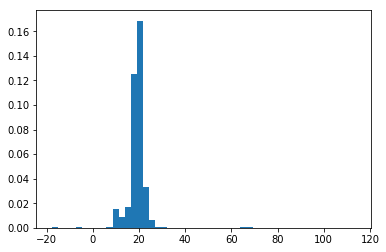

In [48]:
plt.hist(beer2['PrimaryTemp'].dropna(),normed = True,bins = 50)


{'boxes': [<matplotlib.lines.Line2D at 0x118043be0>],
 'caps': [<matplotlib.lines.Line2D at 0x11804b630>,
 'fliers': [<matplotlib.lines.Line2D at 0x1180552e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11804be80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118043d30>,
  <matplotlib.lines.Line2D at 0x11804b208>]}

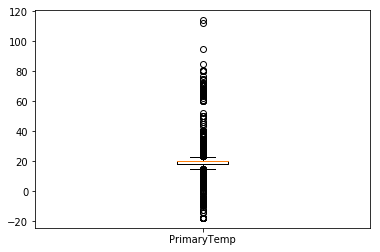

In [49]:
plt.boxplot(beer2['PrimaryTemp'].dropna(), labels = ['PrimaryTemp'])

PrimaryTemp also has a lot of very high outliers. I'll replace nan values with the median.

(array([0.00736803, 1.36915253, 0.7901124 , 1.30052876, 0.        ,
        0.75038285, 0.34745297, 0.26553787, 0.07700309, 0.0924615 ]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

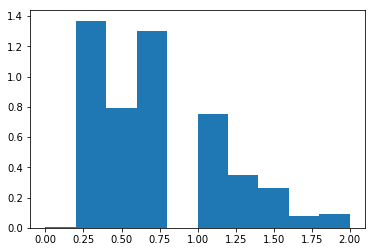

In [50]:
plt.hist(beer2['PitchRate'].dropna(), normed = True)

{'boxes': [<matplotlib.lines.Line2D at 0x117863358>],
 'caps': [<matplotlib.lines.Line2D at 0x1169e9278>,
 'fliers': [<matplotlib.lines.Line2D at 0x1169e9c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1169e9e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1178636d8>,
  <matplotlib.lines.Line2D at 0x117863a58>]}

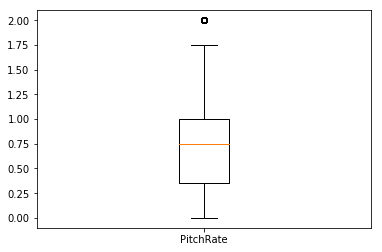

In [51]:
plt.boxplot(beer2['PitchRate'].dropna(), labels = ['PitchRate'])

I could use median or mean for PitchRate to replace the nan values.

In [52]:
beer2['BeerID']=beer2.index
beer2.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,kind,BeerID
BeerID,,,,,,,,,,,,,,,,,,
1,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,NaN,1
2,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,2
3,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,IPA,3
4,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,IPA,4
5,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,NaN,5


In [53]:

beerind = beer2.set_index('kind')
beerind.index.unique()



Index([nan, 'IPA', 'Pale Ales', 'Stout-Porter', 'Lager', 'Weissbier',
       'Light Lager'],
      dtype='object', name='kind')

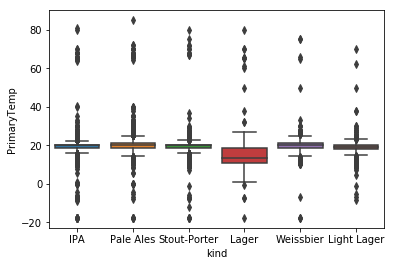

In [54]:
sns.boxplot(x =beerind.index, y = 'PrimaryTemp', data = beerind)

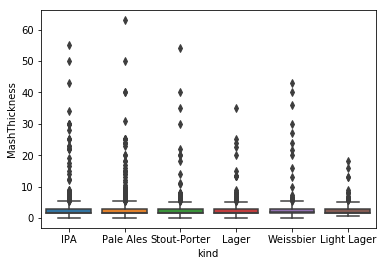

In [55]:
sns.boxplot(x =beerind.index, y = 'MashThickness', data = beerind)

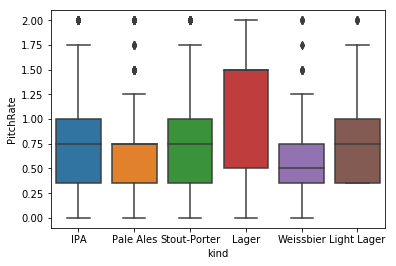

In [56]:
sns.boxplot(x =beerind.index, y = 'PitchRate', data = beerind)
#Median is probably best for PitchRate because of Pale Ales, and Weissbier. Otherwise I could use mena.

In [78]:
beerlist =list(beerind.index.unique())
beerlist = beerlist[1:7]
beerlist

['IPA', 'Pale Ales', 'Stout-Porter', 'Lager', 'Weissbier', 'Light Lager']

In [79]:
beerind2 = beerind.reset_index()


In [80]:

for j in ['PrimaryTemp','PitchRate','MashThickness']:
    fin= pd.DataFrame(None)
    for i in beerlist:
        medians= pd.DataFrame(beerind.loc[i,:].median(axis =0,numeric_only = True))
        result = beerind.loc[i,:][[j,'BeerID']].fillna(int(medians.loc[j]))
        fin = pd.concat([fin,result])
    beerind2 = beerind2.merge(fin, how = 'inner', on ='BeerID')



In [83]:
beerind2.shape
beerind2.head()

,kind,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,...,Efficiency,MashThickness_x,SugarScale,BrewMethod,PitchRate_x,PrimaryTemp_x,BeerID,PrimaryTemp_y,PitchRate_y,MashThickness_y
0,IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,...,70.0,NaN,Specific Gravity,extract,NaN,NaN,3,20.0,0.0,1.0
1,IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,...,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,4,20.0,0.0,1.0
2,Pale Ales,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,...,79.0,NaN,Specific Gravity,All Grain,1.0,NaN,6,20.0,1.0,1.0
3,IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,...,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,7,20.0,0.0,1.0
4,Stout-Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,...,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,9,20.0,0.0,1.0


In [84]:
beerind2 = beerind2.drop(columns=['MashThickness_x','PitchRate_x','PrimaryTemp_x'])

Finally I can drop all the empty fields from the 'kind' column I created and see how many rows I have left.

In [85]:
beerind2.shape

(46108, 18)

In [86]:
beer3 = pd.DataFrame(beerind2.dropna(how = 'any',axis = 0))

In [87]:
beer3.shape

(44574, 18)

In [88]:
beer3.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,BeerID,PrimaryTemp_y,PitchRate_y,MashThickness_y
StyleID,1.000000,-0.004571,0.007070,0.012178,0.029073,-0.150490,0.202524,-0.003820,0.111609,0.006855,0.020540,-0.066183,0.033832,0.074898,0.014869
Size(L),-0.004571,1.000000,0.166321,0.146309,-0.011699,-0.039129,-0.015441,0.996071,0.048228,0.180824,0.114315,-0.004890,-0.005812,0.002065,0.054508
OG,0.007070,0.166321,1.000000,0.946337,0.029093,-0.005517,0.021323,0.167403,0.033200,0.968738,0.072782,-0.040050,-0.003601,0.000810,0.073367
FG,0.012178,0.146309,0.946337,1.000000,0.030904,-0.004536,0.040777,0.147051,0.031400,0.917599,0.066330,-0.042966,-0.000338,-0.005130,0.062807
ABV,0.029073,-0.011699,0.029093,0.030904,1.000000,0.356536,0.279992,-0.007366,0.131360,0.024019,0.070063,-0.052112,0.049477,0.068488,-0.043667
IBU,-0.150490,-0.039129,-0.005517,-0.004536,0.356536,1.000000,0.026163,-0.037487,0.082257,-0.010083,-0.027372,-0.062853,0.039830,0.022499,-0.048868
Color,0.202524,-0.015441,0.021323,0.040777,0.279992,0.026163,1.000000,-0.014464,0.065437,0.018800,-0.013789,-0.052115,0.022649,-0.009293,-0.026516
BoilSize,-0.003820,0.996071,0.167403,0.147051,-0.007366,-0.037487,-0.014464,1.000000,0.054212,0.179733,0.127678,-0.004459,-0.006243,0.004870,0.057603
BoilTime,0.111609,0.048228,0.033200,0.031400,0.131360,0.082257,0.065437,0.054212,1.000000,0.029826,0.162957,-0.061676,-0.020850,0.112466,0.063700
BoilGravity,0.006855,0.180824,0.968738,0.917599,0.024019,-0.010083,0.018800,0.179733,0.029826,1.000000,0.062639,-0.039383,-0.002239,-0.000834,0.072735


In [89]:
# BoilGravity, which has nan values, and OG are very highly correlated with FG.
# BoilSize is too highly correlated with Size(L)
beer3 = pd.DataFrame(beer3.drop(columns = ['OG','BoilGravity','BoilSize']))

In [90]:
beer3.shape

(44574, 15)

In [91]:
beer3dum = pd.get_dummies(beer3.drop(columns = ['kind','StyleID','BeerID']))

In [92]:
beer3dum.head()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp_y,PitchRate_y,MashThickness_y,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
2,24.61,1.013,5.58,40.12,8.00,70,79.0,20.00,1.00,1.0,0,1,1,0,0,0
4,22.71,1.016,5.77,31.63,34.76,75,73.0,20.00,0.00,1.0,0,1,1,0,0,0
5,20.82,1.017,8.22,93.02,8.29,60,70.0,21.11,0.00,1.0,0,1,1,0,0,0
6,25.00,1.014,6.63,64.26,7.78,90,74.0,18.00,1.00,1.0,0,1,1,0,0,0
9,18.93,1.017,6.51,60.96,10.54,60,30.0,18.33,0.35,1.0,0,1,0,0,0,1


In [93]:
beer3dum.corr()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp_y,PitchRate_y,MashThickness_y,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
Size(L),1.000000,0.146309,-0.011699,-0.039129,-0.015441,0.048228,0.114315,-0.005812,0.002065,0.054508,0.171074,-0.171074,0.092327,-0.060271,-0.025537,-0.048726
FG,0.146309,1.000000,0.030904,-0.004536,0.040777,0.031400,0.066330,-0.000338,-0.005130,0.062807,0.892947,-0.892947,0.071164,-0.042097,-0.020774,-0.042005
ABV,-0.011699,0.030904,1.000000,0.356536,0.279992,0.131360,0.070063,0.049477,0.068488,-0.043667,-0.009359,0.009359,0.031371,-0.021223,0.003524,-0.023512
IBU,-0.039129,-0.004536,0.356536,1.000000,0.026163,0.082257,-0.027372,0.039830,0.022499,-0.048868,-0.020165,0.020165,-0.006069,-0.012496,0.011084,0.016596
Color,-0.015441,0.040777,0.279992,0.026163,1.000000,0.065437,-0.013789,0.022649,-0.009293,-0.026516,0.001910,-0.001910,0.009940,-0.009772,0.016984,-0.014040
BoilTime,0.048228,0.031400,0.131360,0.082257,0.065437,1.000000,0.162957,-0.020850,0.112466,0.063700,0.028288,-0.028288,0.158143,-0.024957,-0.059389,-0.165837
Efficiency,0.114315,0.066330,0.070063,-0.027372,-0.013789,0.162957,1.000000,-0.041259,0.085755,0.162771,0.073803,-0.073803,0.465694,0.098336,-0.113885,-0.730397
PrimaryTemp_y,-0.005812,-0.000338,0.049477,0.039830,0.022649,-0.020850,-0.041259,1.000000,-0.223989,-0.001561,-0.007826,0.007826,-0.010793,-0.014563,0.011745,0.025586
PitchRate_y,0.002065,-0.005130,0.068488,0.022499,-0.009293,0.112466,0.085755,-0.223989,1.000000,0.003622,-0.000876,0.000876,0.061310,-0.000195,-0.030283,-0.070826
MashThickness_y,0.054508,0.062807,-0.043667,-0.048868,-0.026516,0.063700,0.162771,-0.001561,0.003622,1.000000,0.080413,-0.080413,0.348304,-0.225728,-0.106573,-0.179192


In [94]:
#The Sugarscales are too strongly correlated with FG.
beer3dum = pd.DataFrame(beer3dum.drop(columns = ['SugarScale_Specific Gravity','SugarScale_Plato']))

In [95]:
#beer3dum = pd.DataFrame(beer3dum.drop(columns = ['BrewMethod_All Grain','BrewMethod_BIAB','BrewMethod_Partial Mash','BrewMethod_extract']))

In [96]:
beer3dum.shape

(44574, 14)

In [97]:
exes = beer3dum
columns = exes.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(exes)
scaled_df = pd.DataFrame(scaled_df, columns = columns)
scaled_df.columns


Index(['Size(L)', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency',
       'PrimaryTemp_y', 'PitchRate_y', 'MashThickness_y',
       'BrewMethod_All Grain', 'BrewMethod_BIAB', 'BrewMethod_Partial Mash',
       'BrewMethod_extract'],
      dtype='object')

In [98]:
beer3['kind'].unique()

array(['Pale Ales', 'Stout-Porter', 'IPA', 'Lager', 'Weissbier',
       'Light Lager'], dtype=object)

In [99]:
y = np.ravel(beer3['kind'])
y = y.astype(str)
X = np.asarray(scaled_df)


In [100]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C = 1e6)


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

##Fit the model.
fit = lr.fit(X_train, Y_train)


In [103]:
# Display.


print('Coefficients') 
print(fit.coef_)
print('Intercepts')
print (fit.intercept_)
pred_y_sklearn = lr.predict(X_test)
pred_y_sklearn = lr.predict(X_train)
print('\n Percentage accuracy')
print('Test',lr.score(X_test, Y_test))
print('Train',lr.score(X_train, Y_train))


Coefficients
[[ 1.13236685e+00  2.59392970e-01  1.72142281e+01  1.52305425e+02
  -4.40877772e+00 -1.78895472e+00 -4.85840052e-01  2.37339248e+00
  -7.08504727e-01 -6.96209896e-01 -5.79705743e-01 -6.54573839e-01
  -8.07165039e-01 -9.58416692e-01]
 [ 1.55599498e+00  2.03677391e-01 -9.59124456e+00 -6.81748156e+01
  -2.15747416e+00 -2.68227486e+00 -8.60301709e-01 -3.41039007e+01
   6.25670398e+00  1.07622500e+00  1.94239595e+00  1.83845551e+00
   2.40274005e+00  2.42615525e+00]
 [ 3.97327050e+00  3.57940062e-01  3.52544597e-01 -9.53919211e+01
  -1.23198437e+00 -3.80263159e+00 -8.90631274e-01 -9.37087487e+00
  -3.71310710e+00  3.16341306e-01  8.77897684e-01  7.57955802e-01
   5.86702631e-01  7.53971681e-01]
 [-3.43120165e+00 -1.08011886e+00 -1.53053099e+01 -3.91569746e+01
  -4.37495390e+00  1.87832045e-01  1.37513084e+00  1.29672255e+01
  -7.38777212e-01  5.93635787e-01 -7.76864552e-01 -6.71326255e-01
  -6.34884244e-01 -5.79026140e-01]
 [-2.56714242e+00  1.10909865e+00 -9.21797380e+00 -7.37

In [104]:
Coefficients = pd.DataFrame(fit.coef_,columns = beer3dum.columns, index = fit.classes_)
Coefficients['Intercepts']=fit.intercept_
print('Coefficients')
Coefficients

Coefficients


,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp_y,PitchRate_y,MashThickness_y,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract,Intercepts
IPA,1.132367,0.259393,17.214228,152.305425,-4.408778,-1.788955,-0.485840,2.373392,-0.708505,-0.696210,-0.579706,-0.654574,-0.807165,-0.958417,-2.999861
Lager,1.555995,0.203677,-9.591245,-68.174816,-2.157474,-2.682275,-0.860302,-34.103901,6.256704,1.076225,1.942396,1.838456,2.402740,2.426155,8.609747
Light Lager,3.973270,0.357940,0.352545,-95.391921,-1.231984,-3.802632,-0.890631,-9.370875,-3.713107,0.316341,0.877898,0.757956,0.586703,0.753972,2.976528
Pale Ales,-3.431202,-1.080119,-15.305310,-39.156975,-4.374954,0.187832,1.375131,12.967225,-0.738777,0.593636,-0.776865,-0.671326,-0.634884,-0.579026,-2.662101
Stout-Porter,-2.567142,1.109099,-9.217974,-73.727251,11.790048,1.554216,1.389548,2.922546,-0.261197,-2.198339,-1.675229,-1.575983,-1.197488,-0.878495,-5.327195
Weissbier,-6.074685,0.571288,-5.910443,-266.631958,-6.439490,5.286331,-0.493230,6.613651,-0.638849,1.580722,-0.396433,-0.364902,-0.184409,-0.617534,-1.563278


In [ ]:
#freq = pd.DataFrame(beerna2['StyleID'].value_counts().reset_index())
#freqcut = pd.DataFrame(freq[freq['StyleID'] > 5])
#freqcut['index'].unique()

In [ ]:
#freqcut['index'].nunique()

In [ ]:
#beerna2cut = pd.DataFrame(beerna2.loc[beerna2['StyleID'].isin(freqcut['index'].unique())])
#beerna2cut['StyleID'].nunique()

In [105]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


In [106]:
rfc = ensemble.RandomForestClassifier(n_jobs = -1)
y = np.ravel(beer3['kind'])
X = pd.DataFrame(beer3dum)


In [107]:
cross_val_score(rfc,X,y,cv=5)

array([0.79816102, 0.78712427, 0.78326228, 0.78963312, 0.77639403])

In [108]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

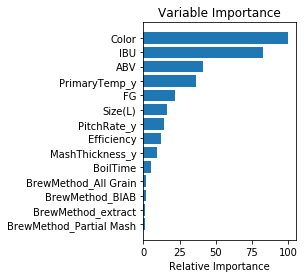

In [109]:

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [110]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [111]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params,subsample=.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)



In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predict_train, normalize=True, sample_weight=None)

0.8313889719812544

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_test, normalize=True, sample_weight=None)

0.7871242709735308